# **CUSTOMER SEGMENTATION FOR AN ONLINE RETAIL BUSINESS**
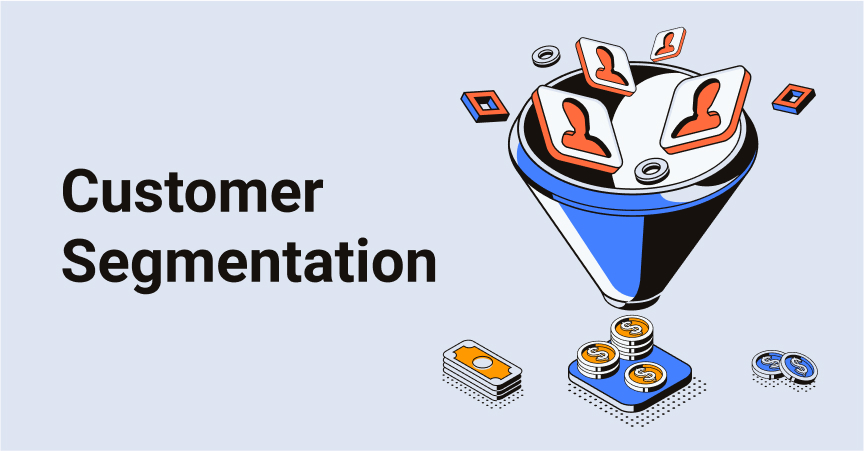

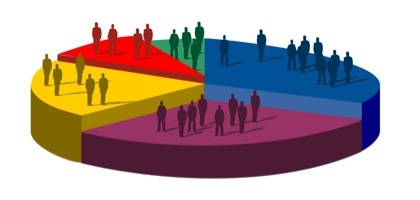

# **Overview**

In this project, we will use unsupervised machine learning techniques to segment customers of a UK-based and registered, non-store online retail store based on their purchase behavior. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. We will use the Online Retail dataset which contains all the transactions for the online store between 01/12/2010 and 09/12/2011. 

# **Problem Statement**

Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarities among customers in each group. The goal of segmenting customers is to make a decision on the way to relate to customers in each segment so as to maximize the worth of every customer to the business.

Our project aims to assist the online retail business understand it's customers' segments based on purchase behavior and assist the company in predicting the right group of new customers for their advertising campaigns.


# **1. Defining the Question**

### **Specifying the Question**

Which customer segments do we have based on purchase behavior?

### **Defining the Metric for Success**

This research will be considered successful when we will be able to come up with clusters that are easily understandable and interpretable for the business based on customers' purchase behavior.

### **Research Objectives**

#### **Main Objective**

We aim to segement the Customers based on RFM using Kmeans clusters so that the company can target its customers efficiently.



#### **Specific Objectives**

1. To find the relationship between country and item mostly purchased
2. To identify the country with the highest sales in a particular year
3. To perform Kmeans clustering on RFM metrics of the data
4. To identify the most popular products
5. To identify customers who frequently make purchases on the online retail store

### **Relevance of the data**

This dataset is relevant in our research of identifying and segmenting customers based on their purchase behaviour. It includes variables such as total cost of each transaction, the quantity of items purchased, the date and time of the transaction, the customer ID and the country of customer's residence.

# **2. Reading and checking the data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [3]:
# Loading the dataset in excel
data = pd.read_excel('/content/drive/MyDrive/Data/Online Retail.xlsx')

In [4]:
# Displaying the top of our dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Displaying the bottom of our dataset
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
# Checking the shape of the dataset
data.shape

(541909, 8)

**Observations**
> The dataset has 541909 rows and 8 columns.

In [7]:
# Checking the info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**Observations**
> From the output, the dataset has some null values on the description and customerID columns. All other columns do not have any null values. The CustomerID column does not have the appropriate datatype while all other columns have the appropriate datatype.

In [8]:
# Checking the columns
list(data)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

### **Explaining the Columns**
1. InvoiceNo: Invoice number - A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code -A 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name.
4. Quantity: The quantities of each product (item) per transaction.
5. InvoiceDate: Invoice date and time - The day and time when a transaction was generated.
6. UnitPrice: Unit price - Product price per unit in sterling (Â£).
7. CustomerID: Customer number - A 5-digit integral number uniquely assigned to each customer.
8. Country: Country name - The name of the country where a customer resides

# **3. External Data Source Validation**

Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK. link

# **4. Data Cleaning**

### Checking for duplicates

In [9]:
# Checking if we have duplicates in the dataset
data.duplicated().sum()

5268

**Observations**
> There are a total of 5268 duplicated values in the dataset.

### Dropping the duplicates

In [10]:
# Dropping the duplicated values in the dataset
data.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Observations**
> After dropping the duplicated values, the dataset has 536641 rows and 8 columns.

### Checking missing values

In [11]:
# Checking the total number of missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**Observations**
> Our dataset has a total of 1454 missing values in the description column and 135080 in the Customerid column.

### Removing missing values

In [12]:
# We will drop the missing values from our dataset and assign the new dataset the variable data1
data1 = data.dropna()
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Observations**
> The new dataframe has 406829 rows and 8 columns

In [13]:
# Checking if there are any missing values in the new dataframe
data1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Observations**
> All the missing values have been dropped.

### Removing canceled invoice numbers

In [14]:
# Removing Invoices starting with "C" as they represent cancelled purchases
data1= data1.loc[data1['InvoiceNo'].str[0] != 'C']
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**Observations**
> After removing the canceled invoice numbers, the new dataframe has 397924 rows and 8 columns

### Creating Additional Columns

In [15]:
# We will create a new feature for the total cost of each transaction
data1.loc[:, 'TotalCost'] = data1.loc[:, 'Quantity'] * data1.loc[:, 'UnitPrice']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [16]:
# We will also create another new feature for the month of each transaction
data1.loc[:, 'InvoiceDate'] = pd.to_datetime(data1.loc[:, 'InvoiceDate'])
data1.loc[:, 'Month'] = data1.loc[:, 'InvoiceDate'].dt.month
data1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12


### Checking for Outliers

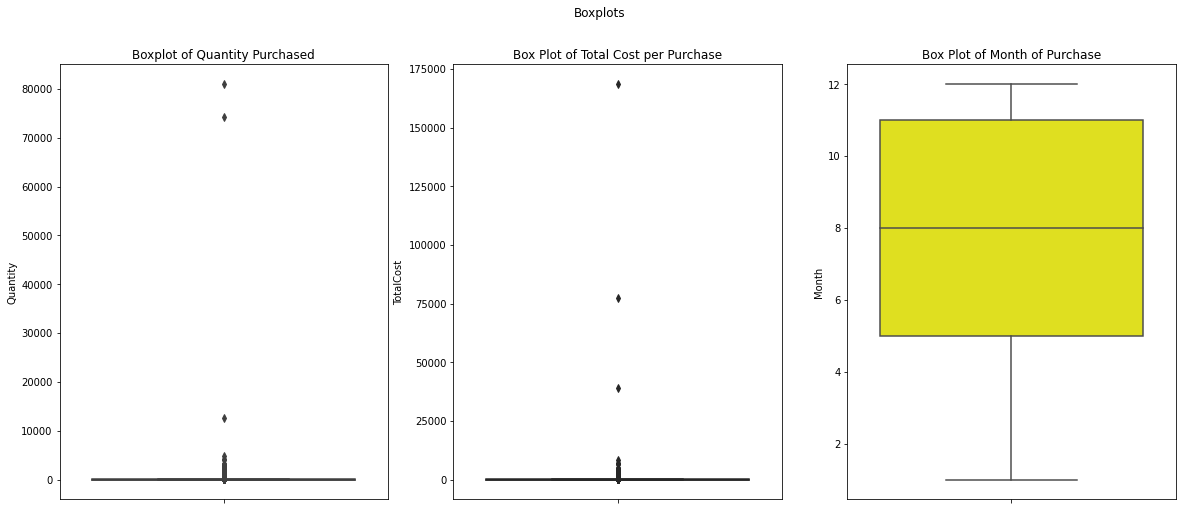

In [17]:
# We will check for outliers in the numerical variables in our dataset
# Quantity, TotalCost and Month
#
fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=data1, y = 'Quantity', ax=ax[0])
ax[0].set_title('Boxplot of Quantity Purchased')
sns.boxplot(data=data1, y = 'TotalCost', ax=ax[1], color = 'green')
ax[1].set_title('Box Plot of Total Cost per Purchase')
sns.boxplot(data=data1, y = 'Month', ax=ax[2], color = 'yellow')
ax[2].set_title('Box Plot of Month of Purchase')
plt.show()

**Observations**
> The output of the boxplots show that there are outliers. We will go ahead and check how many records of outliers we have and decide whether to remove them or use the data as is.
> We will deal with the outliers later

In [18]:
# We could also calculate the IQR for our 3 variables of interest
# Calculating the interquatile ranges for the 3 variables in order to check for anomalies
# IQR for age
q1_q = data1['Quantity'].quantile(0.25)
q3_q = data1['Quantity'].quantile(0.75)

iqr_q = q3_q - q1_q
print(iqr_q)

# IQR for patient's average glucose level
q1_tc = data1['TotalCost'].quantile(0.25)
q3_tc = data1['TotalCost'].quantile(0.75)

iqr_tc = q3_tc - q1_tc
print(iqr_tc)

# IQR for patient's bmi
q1_m = data1['Month'].quantile(0.25)
q3_m = data1['Month'].quantile(0.75)

iqr_m = q3_m - q1_m
print(iqr_m)

10.0
15.119999999999997
6.0


**Observations**
> The output shows that there are 10, 15.11999 and 6 records that are outside the interquatile ranges in the variables, Quantity, TotalCost and Month respectively. This data is useful in our reasearch and will therefore not be removed.

### Checking distinctive values

In [19]:
# Looking for unique values
data1.nunique() 

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
TotalCost       2940
Month             12
dtype: int64

# **5. Exploratory Data Analysis**

We grouped the data by the "Country" and "Description" columns and summed the quantity of each item. We then sorted the data by the quantity of each item and got the top item for each country. Finally, we used the seaborn library to create a bar plot that shows the relationship between country and the item mostly purchased.

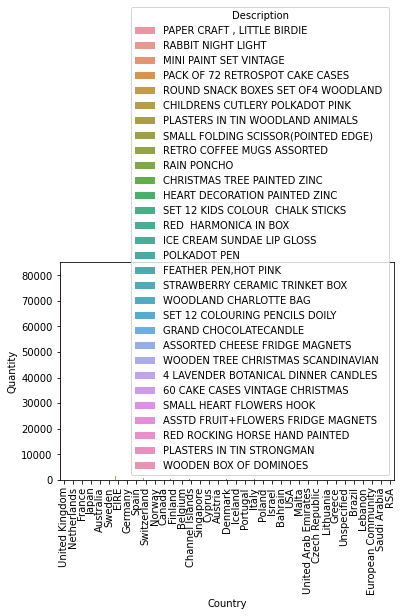

In [20]:
# group data by country and item description
grouped = data1.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# sort by quantity and get the top item for each country
grouped = grouped.sort_values('Quantity', ascending=False).groupby('Country').head(1)

# plot the results
sns.barplot(x='Country', y='Quantity', hue='Description', data=grouped)
plt.xticks(rotation=90)
plt.show()

We grouped the dataframe by country and sum the total sales for each country in both 2010 and 2011. We then find the country with the highest sales in 2010 and 2011 using the idxmax() function and print out the results.

In [21]:
# group by country and sum total sales in 2010 and 2011
sales_by_country_2010 = data1[data1['InvoiceDate'].dt.year == 2010].groupby(['Country'])['TotalCost'].sum()
sales_by_country_2011 = data1[data1['InvoiceDate'].dt.year == 2011].groupby(['Country'])['TotalCost'].sum()

# find the country with the highest sales in 2010
highest_sales_2010 = sales_by_country_2010.idxmax()
print(f"Country with highest sales in 2010: {highest_sales_2010}")

# find the country with the highest sales in 2011
highest_sales_2011 = sales_by_country_2011.idxmax()
print(f"Country with highest sales in 2011: {highest_sales_2011}")


Country with highest sales in 2010: United Kingdom
Country with highest sales in 2011: United Kingdom


Country with highest sales in 2010 and 2011 is the United Kingdom.

We grouped the data by product description and summed the quantity of each product, resulting in a new dataframe that shows the total quantity of each product sold. We then sorted this dataframe by the quantity in descending order and printed the top 10 most popular products by quantity sold.

In [22]:
# group by product and sum the quantity
product_popularity = data1.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# print the top 10 most popular products
print(product_popularity.head(10))


Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


PAPER CRAFT , LITTLE BIRDIE is the most popular product.

We plotted histograms to show the distribution of each feature in the data set

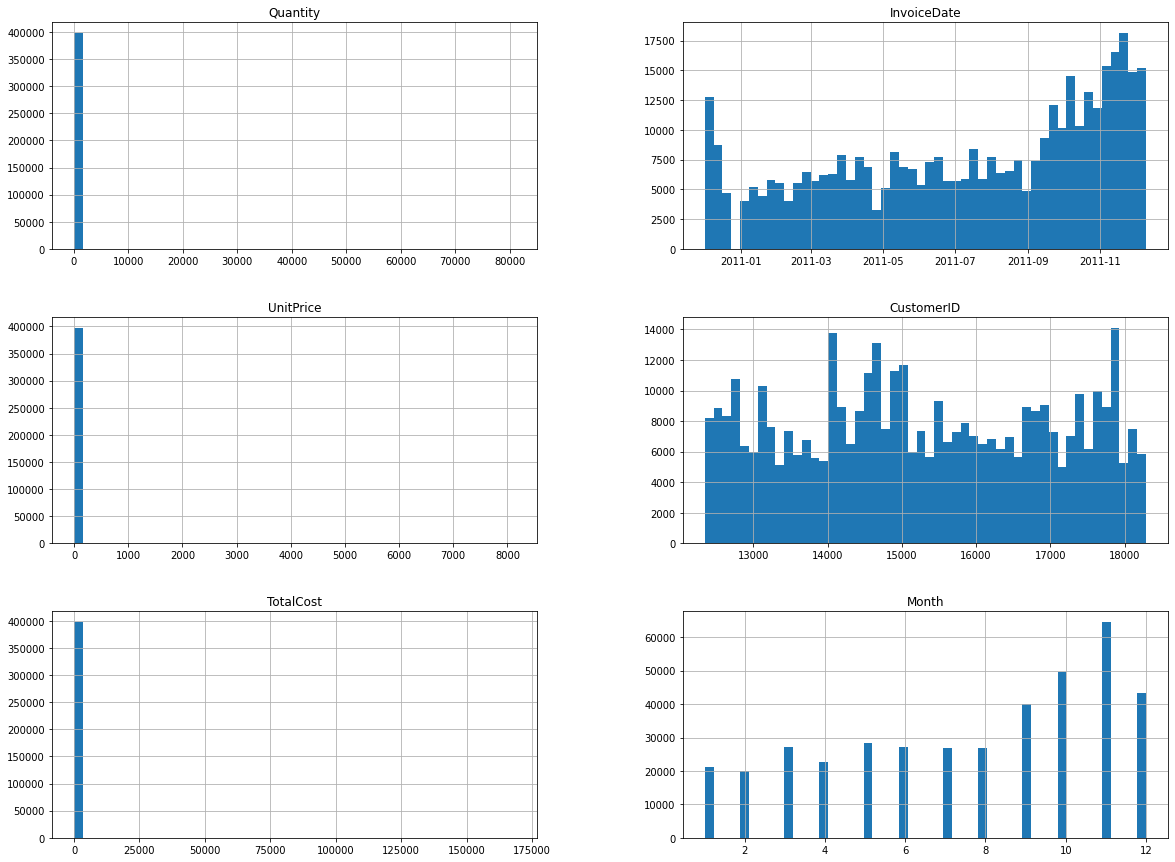

In [23]:
# plot histograms for each feature
data1.hist(bins=50, figsize=(20,15))
plt.show()

We plotted a pairplot to visualize information about the distribution of the data and relationships between variables

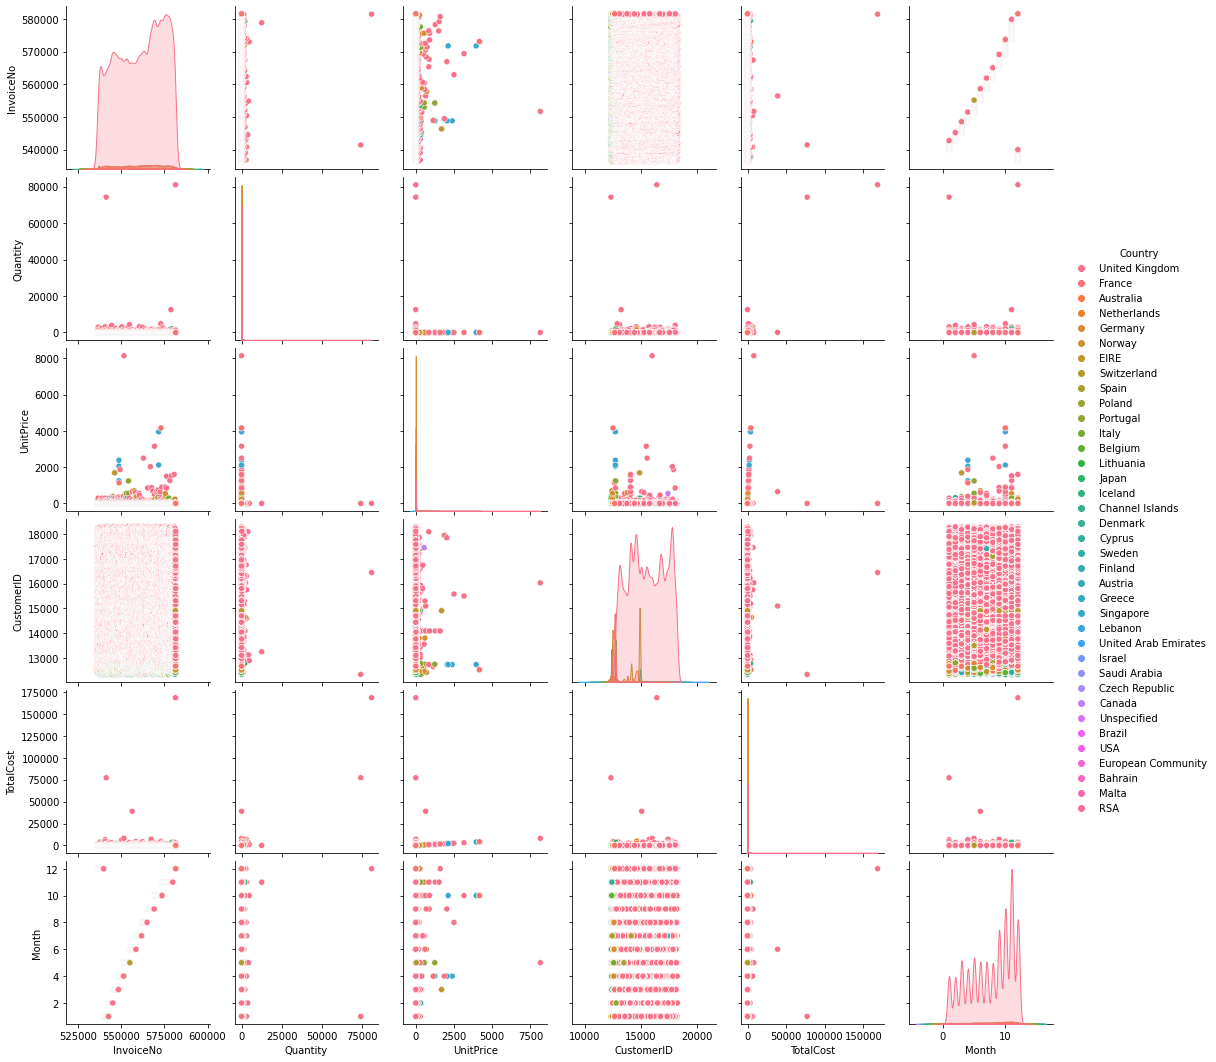

In [24]:
sns.pairplot(data1, hue='Country')
plt.show()

we observed that the distribution of total cost for customers from the United Kingdom appears to be more spread out than for customers from France, as seen in the scatter plots on the diagonal. Additionally, one could observe a positive correlation between quantity and total cost for customers from Germany, as seen in the scatter plot between those two variables

We then plotted boxplots for the various features

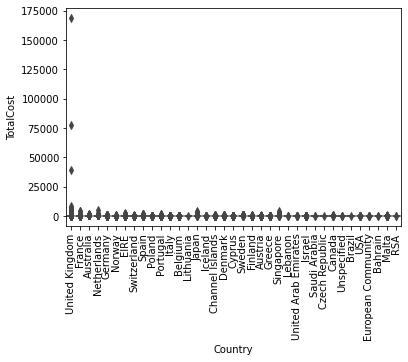

In [25]:
# box plots
sns.boxplot(data=data1, x='Country', y='TotalCost')
plt.xticks(rotation=90)
plt.show()


The box plot shows that countries such as France, Germany, and Spain have relatively lower total costs compared to the United Kingdom.
The United Kingdom has the highest total costs, which could indicate that it is the country with the most sales and/or the highest average purchase value.
The box plot also shows that the spread of total costs is greater for the United Kingdom compared to other countries.
The presence of outliers in the box plot indicates that there are some very high total cost transactions for certain countries.

The plotted heatmap below was for visualizing the strength and direction of the relationship between different variables in the data.

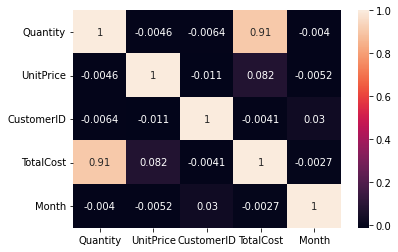

In [26]:
# heatmaps
corr = data1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

 The strong positive correlation (0.91) between  the two variables, Quantity and TotalCost, would indicate that as the quantity of items purchased increases, so does the total cost of the purchase.

#**6. Data Preparation**

##RFM Metrics
**Creating a new dataframe "rfm" for kmeans cluster and segment analysis.**
We are going to analyse the Customers based on below 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of tracsactions
* M (Monetary): Total amount of transactions (TotalCost)

In [27]:
rfm_m = data1.groupby('CustomerID')['TotalCost'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,TotalCost
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [28]:
# New Attribute : Frequency

rfm_f = data1.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [29]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,TotalCost,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [30]:
# New Attribute : Recency

# Convert to datetime to proper datatype

data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'],format='%d-%m-%Y %H:%M')

<ipython-input-30-aa3ffc2955cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'],format='%d-%m-%Y %H:%M')


In [31]:
# Compute the maximum date to know the last transaction date

max_date = max(data1['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [32]:
# Compute the difference between max date and transaction date

data1['Diff'] = max_date - data1['InvoiceDate']
data.head()

<ipython-input-32-8183b8a3a62e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Diff'] = max_date - data1['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
# Compute last transaction date to get the recency of customers

rfm_p = data1.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [34]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [35]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'TotalCost', 'Frequency', 'Recency']
rfm.head()

,CustomerID,TotalCost,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Creating a new dataframe rfm1

In [36]:
rfm1=rfm

In [37]:
# Creating RFM scores from recency, frequency & monetary variables.

rfm1["recency_score"] = pd.qcut(rfm1["Recency"], 5, labels=[5, 4, 3, 2, 1])

rfm1["frequency_score"] = pd.qcut(rfm1["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm1["monetary_score"] = pd.qcut(rfm1["TotalCost"], 5, labels=[1, 2, 3, 4, 5])

rfm1["RFM_SCORE"] = (rfm1['recency_score'].astype(str) + rfm1['frequency_score'].astype(str))

In [38]:
# Setting RFM scores as segment with segmentation map

seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm1["segment"] = rfm1["RFM_SCORE"].replace(seg_map, regex=True)

Now our RFM1 dataframe is ready to be used.

Segment variable is representing each customer's segmentation status. So we can get the descriptive statistics based on Segment variable.

This statistics are better understood when graphically showed.

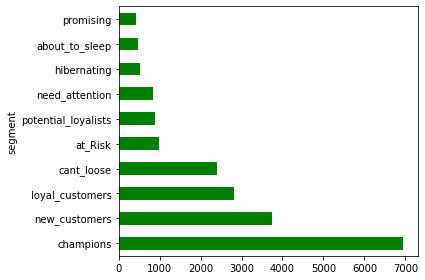

In [39]:
# Creating bar plot for segment variable's monetary mean:

graph1 = rfm1.groupby("segment")["TotalCost"].mean().sort_values(ascending=False)
graph1.plot(kind='barh', color="g")
plt.tight_layout()
plt.show()

As we can see, champions segment is bringing us the largest amount of revenue. Loyal_customers and cant_loose are following champions segment.

We then calculated the ratio of the customer  segments compared to the total sum of revenue  and the number of customers within segments and ratio of them in total customer numbers.

In [40]:
pareto = rfm1.groupby("segment")["TotalCost"].sum().sort_values(ascending=False)
pareto = pareto.to_frame()
pareto["monetary_ratio"] = (pareto["TotalCost"] / pareto["TotalCost"].sum()) * 100
pareto["number"] = rfm1["segment"].value_counts()
pareto["number_ratio"] = (pareto["number"] / pareto["number"].sum()) * 100
pareto

,TotalCost,monetary_ratio,number,number_ratio
segment,,,,
champions,4218731.990,47.340802,607,13.989398
loyal_customers,2337784.570,26.233616,828,19.082738
at_Risk,569172.930,6.387015,578,13.321042
hibernating,556892.142,6.249205,1049,24.176077
potential_loyalists,454701.401,5.102464,505,11.638626
new_customers,205817.320,2.309594,55,1.267573
cant_loose,193875.051,2.175583,81,1.866790
need_attention,175565.740,1.970123,207,4.770684
about_to_sleep,152570.290,1.712078,321,7.398018


Above is the table of segments, monetary sum(TotalCost) of the segments, monetary ration in total revenue (TotalCost), number of customers per segment and the ratio of it.

Champions segment is representing only %14.00 of total customers while generating some %47.34 of the total revenue. So this is why they are called CHAMPIONS!

Loyal_customers segment is following as the second largest segment about revenue. Representing %19.08 of the total customers, loyal_customers segment is generating %26.23 of the total revenue.

So basically we can assume that %32.72 of the total customers are generating %65.61 of the total revenue.

### Outliers 

Text(0.5, 0, 'Attributes')

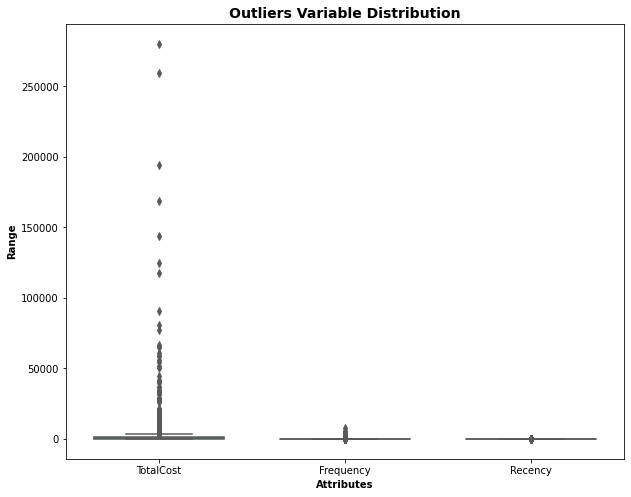

In [41]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['TotalCost','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [42]:
# Removing (statistical) outliers for Total Cost
Q1 = rfm.TotalCost.quantile(0.05)
Q3 = rfm.TotalCost.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.TotalCost >= Q1 - 1.5*IQR) & (rfm.TotalCost <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

### Standardization

Standardization is needed when we want to protect the weights of each value. In this case it's a must!

In [43]:
# Rescaling the attributes

rfm_df = rfm[['TotalCost', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4257, 3)

In [44]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['TotalCost', 'Frequency', 'Recency']
rfm_df_scaled.head()

,TotalCost,Frequency,Recency
0,1.645726,1.067832,-0.917872
1,0.262124,-0.460601,-0.189272
2,0.240269,-0.035474,-0.748198
3,-0.543361,-0.602310,2.156221
4,0.652411,0.085991,-0.578524


# **7. Building the Model**



### K Means clustering

In [45]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [46]:
kmeans.labels_

array([2, 0, 0, ..., 1, 0, 0], dtype=int32)

Finding the Optimal Number of Clusters using The Elbow Method

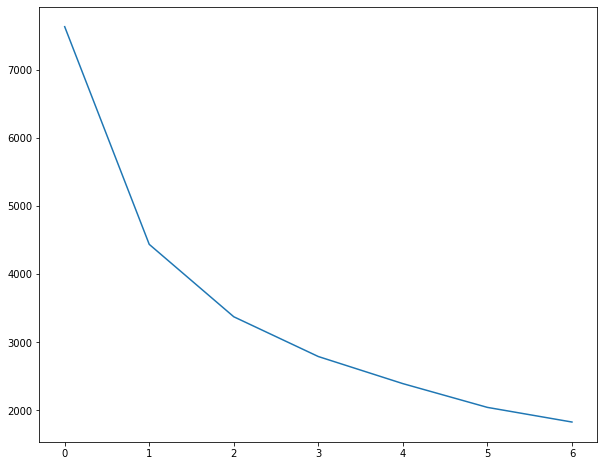

In [47]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

The drastic change at some point shows the best number of clusters. That's why curve at the 3 clusters shows the elbow like shape hence Optimal number of clusters is 3.

###Cluster validation using Silhouette analysis

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [48]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.540625413768531
For n_clusters=3, the silhouette score is 0.5087756865796796
For n_clusters=4, the silhouette score is 0.4851654323063987
For n_clusters=5, the silhouette score is 0.46619818582629496
For n_clusters=6, the silhouette score is 0.41629422231681457
For n_clusters=7, the silhouette score is 0.413435373101441
For n_clusters=8, the silhouette score is 0.40863087267455217


At cluster 3 we have a the silhouette score as 0.5087756865796796 which is statistically sound hence we confirm the validity of using the 3 clusters chosen

### Modeling

In [49]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [50]:
kmeans.labels_

array([1, 0, 0, ..., 2, 0, 0], dtype=int32)

In [51]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,TotalCost,Frequency,Recency,recency_score,frequency_score,monetary_score,RFM_SCORE,segment,Cluster_Id
1,12347.0,4310.00,182,1,5,5,5,55,champions,1
2,12348.0,1797.24,31,74,2,3,4,23,at_Risk,0
3,12349.0,1757.55,73,18,4,4,4,44,loyal_customers,0
4,12350.0,334.40,17,309,1,2,2,12,hibernating,2
5,12352.0,2506.04,85,35,3,4,5,34,loyal_customers,0


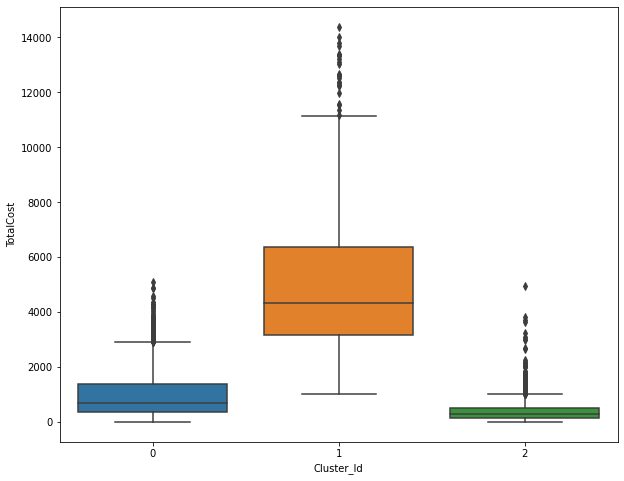

In [52]:
# Box plot to visualize Cluster Id vs Total amount spent

sns.boxplot(x='Cluster_Id', y='TotalCost', data=rfm)

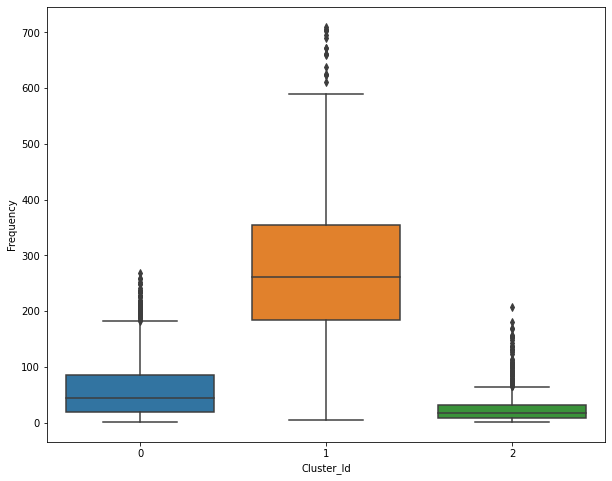

In [53]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

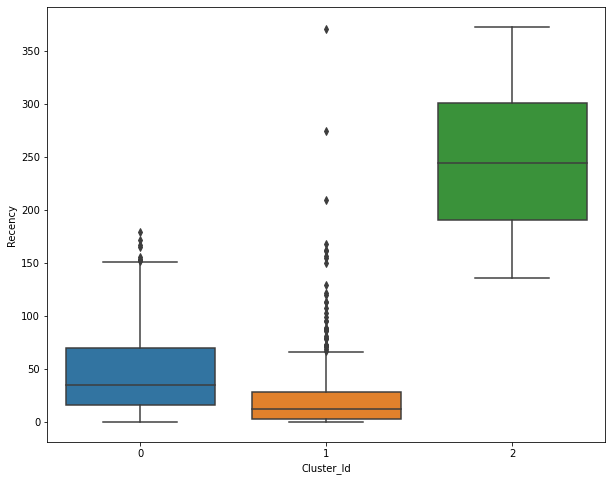

In [54]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

###Evaluating model performance

We use the Calinski-Harabasz Score & Davies-Bouldin index to validate the silhouette score results from earlier and confirm statistical integrity of the model.

In [55]:
# Calinski-Harabasz Score
from sklearn.metrics import calinski_harabasz_score
print("Calinski-Harabasz Score:", calinski_harabasz_score(rfm_df_scaled, cluster_labels))

Calinski-Harabasz Score: 3631.9014311240626


In [56]:
# Davies-Bouldin index
from sklearn.metrics import davies_bouldin_score
print("Davies-Bouldin Score:",davies_bouldin_score(rfm_df_scaled, cluster_labels))

Davies-Bouldin Score: 0.8502790798770803


From the high Calinski-Harabasz Score: 3631.9014311240626 and the low Davies-Bouldin Score: 0.8502790798770803 we find the kmeans clustering model application is accurate.

# **8. Conclusions**

K-Means Clustering with 3 Clusters:

Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.

Customers with Cluster Id 1 are frequent buyers.

Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

The majority of the customers are from the United Kingdom, and the country also has the highest sales in both 2010 and 2011. This suggests that the company should focus on expanding their market in the United Kingdom to increase their revenue.

The most popular products are those that are priced at a lower cost, which suggests that the company should focus on producing and promoting more affordable products to attract more customers.

The data also shows that there are some customers who frequently make purchases on the online retail store. These customers should be identified and targeted with personalized marketing campaigns and special offers to encourage them to continue making purchases.

From the box plot, it is clear that countries like France, Germany and Spain have more outliers in terms of total cost. This indicates that there are some customers in these countries who make high-value purchases. The company should focus on targeting these customers with high-end products and services.

From the heatmap, it is clear that Quantity and UnitPrice are highly correlated with each other. This suggests that the company should focus on increasing the quantity of products sold as this will increase the revenue.

The histograms show that most of the data is skewed to the left, indicating that the majority of the purchases are low-value transactions. The company should focus on increasing the average purchase value by promoting high-value products and services.

From the pairplot, we can observe that the distribution of TotalCost for different countries is different. This suggests that the company should focus on implementing country-specific strategies to increase sales.

The table of most purchased items for each country provides a clear picture of which items are popular in which countries. The company should focus on producing more of these popular items and promoting them in the relevant countries.